Damir Nurtdinov BS20-RO
# Task 1
 You have to synthesize audio for each letter separately.

To complete the task I recorded each letter of my name separately to analyse it and then synthesize.

In [ ]:
import thinkdsp
from thinkdsp import CosSignal, SinSignal, SquareSignal, SawtoothSignal, ParabolicSignal, CubicSignal, TriangleSignal, GlottalSignal, decorate, play_wave, read_wave, Wave
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

Here I used my name and divided it into 5 segments (letters)

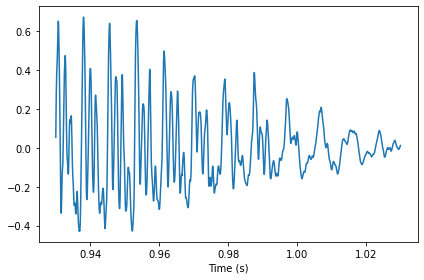

In [104]:
wave_letter_d = read_wave('damir.wav')
dstart = 0.2
ddur = 0.168
segmentD = wave_letter_d.segment(dstart, ddur)
# segmentD.plot()

wave_letter_a = read_wave('damir.wav')
astart = 0.395
adur = 0.195
segmentA = wave_letter_a.segment(astart, adur)
# segmentA.plot()

wave_letter_m = read_wave('damir.wav')
mstart = 0.59
mdur = 0.17
segmentM = wave_letter_m.segment(mstart, mdur)
# segmentM.plot()

wave_letter_i = read_wave('LetterI.wav')
istart = 0.76
idur = 0.17
segmentI = wave_letter_i.segment(istart, idur)
# segmentI.plot()

wave_letter_r = read_wave('LetterR.wav')
rstart = 0.93
rdur = 0.1
segmentR = wave_letter_r.segment(rstart, rdur)
segmentR.plot()

decorate(xlabel='Time (s)')

Here I checked each letter to bound it properly

In [105]:
d = segmentD.make_audio()
a = segmentA.make_audio()
m = segmentM.make_audio()
i = segmentI.make_audio()
r = segmentR.make_audio()


I made each letter(sound) with sin wave

In [106]:
import sys
sys.setrecursionlimit(100000)

spectrumD = segmentD.make_spectrum()
spectrumA = segmentA.make_spectrum()
spectrumM = segmentM.make_spectrum()
spectrumI = segmentI.make_spectrum()
spectrumR = segmentR.make_spectrum()

def make_sin_wave_from_spectrum(spectrum, start, dur):
    spectrum.low_pass(3000)
    peaks = spectrum.peaks()
    sin_sig = SinSignal(freq=0, amp=0, offset=0)
    for peak in peaks:
        sin_sig += SinSignal(freq=peak[1], amp=peak[0], offset=0)
    wave = sin_sig.make_wave(start=start, duration=dur)
    wave.normalize()
    wave.apodize()
    return wave

In [107]:
d_wave = make_sin_wave_from_spectrum(spectrumD, start=dstart, dur=ddur)
d_wave.write('D.wav')
a_wave = make_sin_wave_from_spectrum(spectrumA, start=astart, dur=adur)
a_wave.write('a.wav')
m_wave = make_sin_wave_from_spectrum(spectrumM, start=mstart, dur=mdur)
m_wave.write('m.wav')
i_wave = make_sin_wave_from_spectrum(spectrumI, start=istart, dur=idur)
i_wave.write('i.wav')
r_wave = make_sin_wave_from_spectrum(spectrumR, start=rstart, dur=rdur)
r_wave.write('r.wav')

Writing D.wav
Writing a.wav
Writing m.wav
Writing i.wav
Writing r.wav


In [108]:
word_ys = list(d_wave.ys)[:] + list(a_wave.ys)[:] + list(m_wave.ys)[:] + list(i_wave.ys)[:] + list(r_wave.ys)[:]
word_wave = Wave(ys=word_ys)
word_wave.make_audio()
word_wave.write('Damir.wav')

Writing Damir.wav


## Next part is to create my name using combination of Sin,Square and Cos signals
1) I add one of these function randomly

In [109]:
def make_wave_from_spectrum_rnd(spectrum, start, dur):
    spectrum.low_pass(3000)
    peaks = spectrum.peaks()
    sig = SquareSignal(freq=0, amp=0, offset=0)
    for peak in peaks:
        random_num = np.random.randint(0, 3) # 0-sin, 1-cos, 2-square
        if random_num == 0:
            sig += SinSignal(freq=peak[1], amp=peak[0], offset=0)
        elif random_num == 1:
            sig += CosSignal(freq=peak[1], amp=peak[0], offset=0)
        else:
            sig += SquareSignal(freq=peak[1], amp=peak[0], offset=0)
    wave = sig.make_wave(start=start, duration=dur)
    wave.normalize()
    wave.apodize()
    return wave

d_wave = make_wave_from_spectrum_rnd(spectrumD, start=dstart, dur=ddur)
a_wave = make_wave_from_spectrum_rnd(spectrumA, start=astart, dur=adur)
m_wave = make_wave_from_spectrum_rnd(spectrumM, start=mstart, dur=mdur)
i_wave = make_wave_from_spectrum_rnd(spectrumI, start=istart, dur=idur)
r_wave = make_wave_from_spectrum_rnd(spectrumR, start=rstart, dur=rdur)

word2_ys = list(d_wave.ys)[:] + list(a_wave.ys)[:] + list(m_wave.ys)[:] + list(i_wave.ys)[:] + list(r_wave.ys)[:]
word2_wave = Wave(ys=word2_ys)
word2_wave.make_audio()

2. I tried to sum all the waves, but with different multipliers. Maybe the word which is made of sin waves sounds better, so I uploaded sin-based word

In [110]:
def make_wave_from_spectrum_best(spectrum, start, dur):
    spectrum.low_pass(3000)
    peaks = spectrum.peaks()
    square_sig = CosSignal(freq=0, amp=0, offset=0)
    for peak in peaks:
        square_sig += CosSignal(freq=peak[1]*1.3, amp=peak[0], offset=0) + SinSignal(freq=peak[1]*1.2, amp=peak[0]*1, offset=0) + SquareSignal(freq=peak[1]/100, amp=peak[0]/100, offset=0)
    wave = square_sig.make_wave(start=start, duration=dur)
    wave.normalize()
    wave.apodize()
    return wave

d_wave = make_wave_from_spectrum_best(spectrumD, start=dstart, dur=ddur)
a_wave = make_wave_from_spectrum_best(spectrumA, start=astart, dur=adur)
m_wave = make_wave_from_spectrum_best(spectrumM, start=mstart, dur=mdur)
i_wave = make_wave_from_spectrum_best(spectrumI, start=istart, dur=idur)
r_wave = make_wave_from_spectrum_best(spectrumR, start=rstart, dur=rdur)

word3_ys = list(d_wave.ys)[:] + list(a_wave.ys)[:] + list(m_wave.ys)[:] + list(i_wave.ys)[:] + list(r_wave.ys)[:]
word3_wave = Wave(ys=word3_ys)
word3_wave.make_audio()